In [2]:
import pandas as pd
import time
import re
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import spacy


In [3]:
intents = {
    'hi' : ['hello','hey','hi!','hi'],
    'bye' : ['goodbye','buhbye','bye'],
    'depression' : ['depressed','sad','worried','despair','misery','bad'],
    'anxiety' : ['anxiety','anxious','nervous','stress','strain','tension','discomfort','tensed'],
    'paranoia' :['disbelieve', 'distrustful', 'doubting', 'incredulous','mistrustful', 'negativistic','questioning','show-me','skeptical','suspecting','suspicious','unbelieving'],
    'sleeping_disorder' :['restlessness','indisposition','sleeplessness','stress','tension','vigil','vigilance','wakefulness'],
    'substance_abuse' :['alcohol abuse','drug abuse','drug use','addiction','alcoholic addiction','alcoholism','chemical abuse','dipsomania','drug dependence','drug habit','narcotics abuse','solvent abuse'],
    'personality_disorder':['insanity','mental disorder','schizophrenia','craziness','delusions','depression','derangement','disturbed mind','emotional disorder','emotional instability',
                            'loss of mind','lunacy','madness','maladjustment','mania','mental disease','mental sickness','nervous breakdown','nervous disorder',
                            'neurosis','neurotic disorder','paranoia','phobia','psychopathy','psychosis','sick mind','troubled mind','unbalanced mind','unsoundness of mind'],
    'happy':['good','great','relieved','happy','okay']
}


In [4]:
responses = {
    'hi' : 'Hello, i am a medical healthcare chatbot!',
    'bye' : 'Thank you for your time!',
    'default' : 'Sorry, i am not able to understand you'
}


In [5]:
dictionary = {
    'a':0,
    'b' : 0,
    'c' : 0,
    'd' : 0
}




In [6]:
s = {
    'a':0,
    'b' : 1,
    'c' : 2,
    'd' : 3
}


In [7]:
questions = ["Do you have little interest or pleasure in doing things?","Feeling down, depressed, or hopeless","Trouble falling or staying asleep, or sleeping too much","Feeling tired or having little energy","Feeling bad about yourself - or that you are a failure or have let yourself or your family down"]

data = pd.read_csv(r"C:\Users\lokes\coding filess\PYTHON\NLP\datasets\emotion dataset\emotion.csv", header=0,delimiter=",", quoting=2)

#nlp = spacy.load("en_core_web_lg")

bot = "BOT: {0}"
user =  "USER: {0}"


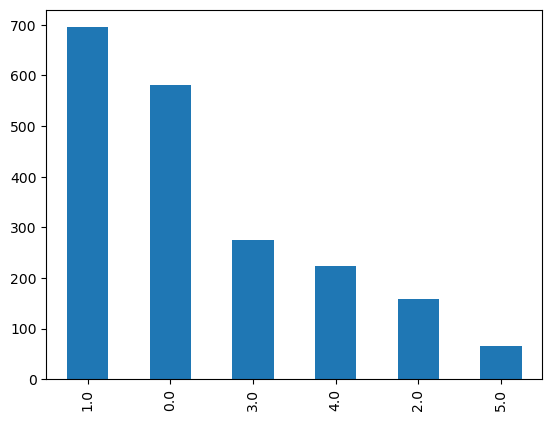

Index(['text', 'emotions'], dtype='object')


In [8]:
#data = data[0:100]
data['emotions'].value_counts().plot.bar()
plt.show()
print(data.columns)


**spliting the data into training and testing**\

In [9]:
train, test = train_test_split(data, test_size = 0.2, random_state = 12, stratify = data['emotions'])


In [10]:
data = pd.read_csv(r"C:\Users\lokes\coding filess\PYTHON\NLP\datasets\emotion dataset\emotion.csv", header=0, delimiter=",", quoting=2, usecols=['text', 'emotions'])


In [11]:
X = data['text']
y = data['emotions']

X_train = train.text
y_train = train.emotions
X_test = test.text
y_test = test.emotions


**TF-IDF Vectorization**
Before training the logistic regression model, the text data is converted into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization

**max_df=0.9:** Ignores terms that have a document frequency higher than 0.9 (terms occurring in more than 90% of the documents). This helps filter out common words that might not contribute much to the classification.

In [12]:
vectorizer = TfidfVectorizer( max_df= 0.9).fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape)


(1600, 4227)


In [13]:
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


*Logistic Regression Model:*
**Initialization:**

**LogisticRegression:** 

This is a linear model for binary and multiclass classification. It uses the logistic function to model a binary dependent variable.

**Parameters:**
C=0.1: This parameter controls the regularization strength, with smaller values indicating stronger regularization. It helps prevent overfitting by penalizing large coefficients.
class_weight='balanced': This parameter is used to handle imbalanced classes by adjusting the weights inversely proportional to class frequencies.

**Training:**
fit(X_train, y_train): This method trains the logistic regression model on the training data (X_train - TF-IDF vectorized text) with corresponding labels (y_train - emotion labels).

**Prediction:**
After training, the model is used to predict the labels for both the training and testing.

In [14]:
model = LogisticRegression(C=.1, class_weight='balanced')
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy  : ", accuracy_score(y_test, y_pred_test))


Training Accuracy :  0.829375
Testing Accuracy  :  0.535


In [15]:
negative = 0
positive = 0

In [16]:
def intent(message):
    for words in intents.keys():
        pattern = re.compile('|'.join([syn for syn in intents[words]]))
        match = pattern.search(message)
        if match:
            return words
    return 'default'

def respond(message):
    word = intent(message)
    return responses[word]



In [17]:

def score(name):
    sc = 0
    for k in dictionary.keys():
        sc += dictionary[k]*s[k]
    print("Your mental assessment score is ",sc)
    if(sc >=0 and sc <=5):
        print(bot.format("Please make sure that you keep checking in with me. What's your mood now after opening up?"))
        message = input().lower()
        m_intent = intent(message)
        if(m_intent == 'depression'):
            depression(name)
        elif(m_intent == 'anxiety'):
            anxiety(name)
        elif(m_intent == 'sleeping disorder'):
            sleeping_disorder(name)
        elif(m_intent == 'paranoia'):
            paranoia(name)
        elif(m_intent == 'personality_disorder'):
            personality_disorder(name)
        elif(m_intent == substance_abuse):
            substance_abuse(name)
        elif(m_intent == 'happy'):
            time.sleep(1)
            print(bot.format("Please ask me for help whenever you feel like it! I'm always online."))
        else:
            extreme(name)
    elif sc >=6 and sc <=15:
        extreme(name)


In [18]:
def extreme(name):
    print(bot.format("We\'re really sorry to know that and for further assistance we would try to connect you with our local assistance who is available 24/7"))
    time.sleep(1)
    print(bot.format("Here are the details",name))
    print(bot.format("Contact Jeevan Suicide Prevention Hotline"))
    print(bot.format("Address:171, Ambiga Street Golden George Nagar, Nerkundram, Chennai, Tamil Nadu 600107"))
    print(bot.format("Number : 044 2656 4444"))


In [19]:
def quiz(name):
    time.sleep(1)
    print(bot.format("Now we're starting with a small assessment and hopefully at the end of the assessment,we'll be able to evaluate your mental health"))
    print()
    time.sleep(0.8)
    print(bot.format("To respond please type the following answer depending upon your choice"))
    print("A. not at all")
    print("B. several days")
    print("C. more than half a day")
    print("D. all the days")
    print()
    time.sleep(1)
    print("Now we'll be starting with the quiz,type okay if you're ready!")
    inp = input().lower()
    if inp == 'okay':
        for sentence in questions:
            time.sleep(1)
            print(bot.format(sentence))
            resp = input().lower()
            dictionary[resp]=dictionary[resp]+1
    else:
        greet()
    print()
    time.sleep(1)
    print("Thank you for taking the assessment!")
    for k in dictionary.keys():
        print(k,dictionary[k])
    score(name)

def predict_(x):
    tfidf = vectorizer.transform([x])
    preds = model.predict(tfidf)
    probab = model.predict_proba(tfidf)[0][preds]
    print(preds,probab)
    feeling(preds,probab)
    return preds


In [20]:

def feeling(pred,probab):
    global negative,positive
    if pred == 0 or pred == 1 or pred == 4:
        negative = negative + 1;
        if probab >= 0.5:
            time.sleep(1)
            print(bot.format("Oh, sorry to hear that!"))
        else:
            time.sleep(1)
            print(bot.format("Okay, thanks for sharing."))
    else:
        positive = positive + 1;
        if probab >= 0.5:
            time.sleep(1)
            print(bot.format("That's great to hear!"))
        else:
            time.sleep(1)
            print(bot.format("Okay, thanks for sharing."))



In [21]:
def classification(pred):
    if pred == 0 or pred == 1 or pred ==4:
        return 0
    else:
        return 1



In [22]:
def name_extraction(message):
    doc = nlp(message)
    name = ''
    for ent in doc.ents:
        if ent.label_=="PERSON":
            return str(ent)
    x = message.split()
    if len(x)<=2:
        return (x[0])
    elif (' '.join(x[0:3]).lower())=='my name is':
        return ''.join(x[3:])




In [23]:
def cbt():
    time.sleep(1)
    print(bot.format("Mood tracking and thinking hygiene - among other useful concepts - are skills you'll learn as you practice CBT"))
    time.sleep(1)
    print(bot.format("Skills that can help you make positive changes to your thoughts, feelings and behaviour"))



In [24]:
def depression(name):
    time.sleep(1)
    print(bot.format('Gosh, that is tough'))
    time.sleep(1)
    print(bot.format('I am sorry to hear that,'),name)
    time.sleep(1)
    print(bot.format('Here is a thought that might motivate you!'))
    time.sleep(1)
    print(bot.format('There you go...let it all slide out.Unhappiness cannot stick in a person\'s soul when it\'s slick with tear.'))



In [25]:
def anxiety(name):
    time.sleep(1)
    print(bot.format('Gosh, that is tough'))
    time.sleep(1)
    print(bot.format('I am sorry to hear that,'),name)
    time.sleep(1)
    print(bot.format('Here is a thought that might motivate you!'))
    time.sleep(1)
    print(bot.format('Take a deep breath, listen to your thoughts, try to figure them out. Then take things one day at a time.'))



In [26]:
def paranoia(name):
    time.sleep(1)
    print(bot.format('Gosh, that is tough'))
    time.sleep(1)
    print(bot.format('I am sorry to hear that,'),name)
    time.sleep(1)
    print(bot.format('Here is a thought that might motivate you!'))
    time.sleep(1)
    print(bot.format('If you want someone, you have to be willing to wait for them and trust that what you have is real and strong enough for them to wait for you. If somebody jumps ship for you, that fact will always haunt you because you\'ll know they\'re light on their feet. Spare yourself the paranoia and the pain and walk away until the coast is clear.'))



In [27]:
def sleeping_disorder(name):
    time.sleep(1)
    print(bot.format('Gosh, that is tough'))
    time.sleep(1)
    print(bot.format('I am sorry to hear that,'),name)
    time.sleep(1)
    print(bot.format('Here is a thought that might motivate you!'))
    time.sleep(1)
    print(bot.format('Overhead, the glass envelope of the Insomnia Balloon is malfunctioning. It blinks on and off at arrhythmic intervals, making the world go gray:black, gray:black. In the distance, a knot of twisted trees flashes like cerebral circuitry.'))



In [28]:

def personality_disorder(name):
    time.sleep(1)
    print(bot.format('Gosh, that is tough'))
    time.sleep(1)
    print(bot.format('I am sorry to hear that,'),name)
    time.sleep(1)
    print(bot.format('Here is a thought that might motivate you!'))
    time.sleep(1)
    print(bot.format('...repeated trauma in childhood forms and deforms the personality. The child trapped in an abusive environment is faced with formidable tasks of adaptation. She must find a way to preserve a sense of trust in people who are untrustworthy, safety in a situation that is unsafe, control in a situation that is terrifyingly unpredictable, power in a situation of helplessness. Unable to care for or protect herself, she must compensate for the failures of adult care and protection with the only means at her disposal, an immature system of psychological defenses.'))




In [29]:
def substance_abuse(name):
    time.sleep(1)
    print(bot.format('Gosh, that is tough'))
    time.sleep(1)
    print(bot.format('I am sorry to hear that,'),name)
    time.sleep(1)
    print(bot.format('Here is a thought that might motivate you!'))
    time.sleep(1)
    print(bot.format(' My Recovery Must Come First So That Everything I Love In Life Doesn’t Have To Come Last.'))

In [30]:
def greet():
    global negative,positive
    while True:
        time.sleep(1)
        negative = 0
        positive = 0
        print(bot.format('Hi! I\'m a medical healthcare chatbot!'))
        time.sleep(1)
        print(bot.format('Before we proceed, may I know your first name?'))
        message = input()
        name = message
        time.sleep(1)
        print(bot.format(name),", That's a nice name!")
        time.sleep(1)
        print(bot.format("Before we get started, I want to know about your current mood"))
        message = input().lower()
        sentiment = predict_(message)
        time.sleep(1)
        print(bot.format("So"),name,"I'm a CBT coach that can consult with during difficult times, and also not-so-difficult times. Do you wanna know a little more?")
        time.sleep(1)
        message = input().lower()
        sentiment = predict_(message)
        pos = classification(sentiment)
        if pos == 1:
            cbt()
        print(bot.format(name),",can you walk me through how did your last week go?")
        time.sleep(1)
        message = input().lower()
        sentiment = predict_(message)
        pos = classification(sentiment)
        if pos == 0:
            time.sleep(1)
            print(bot.format(name),"I know that question can be tough and sometime painful to answer so I really appreciate you doing it")
        time.sleep(1)
        print(bot.format("Can you tell me a bit about what's going on in your life that has brought you here today?"))
        message = input().lower()
        sentiment = predict_(message)
        if(negative == 0):
            time.sleep(1)
            print(bot.format("That's awesome! You are showing improvement!"))
            time.sleep(1)
        else:
            time.sleep(1)
            print(bot.format('I have got great tools for people dealing with stress,wanna give it a go,Yes/No?'))
            time.sleep(1)
            message = input().lower()
            if  message == 'yes':
                print(bot.format("Great! Thanks for trusting me",name))
                time.sleep(1)
                print(bot.format("Let's start with a small mental assessment test,so buckle up!"))
                time.sleep(1)
                quiz(name)
            else:
                time.sleep(1)
                print(bot.format("Please ask me for help whenever you feel like it! I'm always online."))



greet()

BOT: Hi! I'm a medical healthcare chatbot!
BOT: Before we proceed, may I know your first name?
BOT: loki , That's a nice name!
BOT: Before we get started, I want to know about your current mood
[1] [0.2073405]
BOT: Okay, thanks for sharing.
BOT: So loki I'm a CBT coach that can consult with during difficult times, and also not-so-difficult times. Do you wanna know a little more?
[0] [0.17541447]
BOT: Okay, thanks for sharing.
BOT: loki ,can you walk me through how did your last week go?
[1] [0.17658848]
BOT: Okay, thanks for sharing.
BOT: loki I know that question can be tough and sometime painful to answer so I really appreciate you doing it
BOT: Can you tell me a bit about what's going on in your life that has brought you here today?
[3] [0.19167636]
BOT: Okay, thanks for sharing.
BOT: I have got great tools for people dealing with stress,wanna give it a go,Yes/No?
BOT: Please ask me for help whenever you feel like it! I'm always online.
BOT: Hi! I'm a medical healthcare chatbot!
BOT